In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.io as sio

In [2]:
def is_edge_pixel(matrix, i, j, count_corners=False):
    # Get the shape of the matrix
    rows, cols = matrix.shape

    # Check if the pixel is an edge pixel
    if matrix[i, j] == 1:
        if count_corners:
            # Check the 8 neighbors
            return (
                    i > 0 and matrix[i - 1, j] == 0 or
                    i < rows - 1 and matrix[i + 1, j] == 0 or
                    j > 0 and matrix[i, j - 1] == 0 or
                    j < cols - 1 and matrix[i, j + 1] == 0 or
                    i > 0 and j > 0 and matrix[i - 1, j - 1] == 0 or
                    i < rows - 1 and j < cols - 1 and matrix[i + 1, j + 1] == 0 or
                    i > 0 and j < cols - 1 and matrix[i - 1, j + 1] == 0 or
                    i < rows - 1 and j > 0 and matrix[i + 1, j - 1] == 0
            )
        else:
            # Check the 4 neighbors
            return (
                    i > 0 and matrix[i - 1, j] == 0 or
                    i < rows - 1 and matrix[i + 1, j] == 0 or
                    j > 0 and matrix[i, j - 1] == 0 or
                    j < cols - 1 and matrix[i, j + 1] == 0
            )
    else:
        return False

def find_edge_pixels(matrix, count_corners=False):
    """Find the edge pixels in a matrix."""
    # Get the size of the matrix
    n = matrix.shape[0]

    # Initialize an empty list to store the edge pixel locations
    edge_pixels = []

    # Loop over all pixels in the matrix
    for i in range(n):
        for j in range(n):
            # Check if the current pixel is an edge pixel
            if is_edge_pixel(matrix, i, j, count_corners):
                # If it is, add its location to the list of edge pixel locations
                edge_pixels.append((i, j))

    # Return the list of edge pixel locations
    return edge_pixels

def get_edge_pixels_matrix(matrix):
    # Create a new matrix filled with zeros
    edge_matrix = np.zeros_like(matrix)

    # Get the edge pixels
    edges = find_edge_pixels(matrix)

    # Set the edge pixels to 1 in the new matrix
    for i, j in edges:
        edge_matrix[i][j] = 1

    return edge_matrix

def flip_edge_pixels(matrix, flip_chance, count_corners=False, seed=None):
    # Set the seed for the random number generator
    random.seed(seed)

    # Get the edge pixels
    edges = find_edge_pixels(matrix, count_corners)

    # Create a copy of the matrix so we don't modify the original
    new_matrix = matrix.copy()

    # Flip each edge pixel with the given probability
    for i, j in edges:
        if random.random() < flip_chance:
            new_matrix[i, j] = 0 if new_matrix[i, j] == 1 else 1

    return new_matrix

def visualize_matrices(matrix1, matrix2):
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjust the size as needed

    # Display the first image in the first subplot
    axes[0].imshow(matrix1, cmap='gray_r')
    axes[0].axis('off')

    # Display the second image in the second subplot
    axes[1].imshow(matrix2, cmap='gray_r')
    axes[1].axis('off')


In [3]:
def generate_geometry(size, symmetry, volume_fraction, seed=None):
    if seed is not None:
        np.random.seed(seed)

    if symmetry == 0:
        # Calculate the number of pixels to be filled
        num_pixels = int(round(size * size * volume_fraction))
        # Initialize an array of zeros
        image = np.zeros((size, size))
        # Randomly choose pixels to fill
        fill_indices = np.random.choice(size*size, num_pixels, replace=False)
        image.put(fill_indices, 1)
    elif symmetry == 1:
        half_size = size // 2
        num_pixels = int(round(half_size * size * volume_fraction))
        half_image = np.zeros((size, half_size))
        fill_indices = np.random.choice(half_size*size, num_pixels, replace=False)
        half_image.put(fill_indices, 1)
        # Mirror the half image
        image = np.concatenate((half_image, np.fliplr(half_image)), axis=1)
    elif symmetry == 2:
        quarter_size = size // 2
        num_pixels = int(round(quarter_size * quarter_size * volume_fraction))
        quarter_image = np.zeros((quarter_size, quarter_size))
        fill_indices = np.random.choice(quarter_size*quarter_size, num_pixels, replace=False)
        quarter_image.put(fill_indices, 1)
        # Mirror the quarter image
        half_image = np.concatenate((quarter_image, np.flipud(quarter_image)), axis=0)
        image = np.concatenate((half_image, np.fliplr(half_image)), axis=1)
    else:
        raise ValueError("Symmetry should be 0, 1, or 2.")

    return image

In [25]:
def generate_mutations(image, n, size, symmetry, volume_fraction, flip_chance, seed=None, count_corners=False):
    # Initialize a list to store the matrices
    matrices = []
    matrices.append(image)
    for _ in range(n-1):
        # Flip the edge pixels
        flipped_image = flip_edge_pixels(image, flip_chance, seed=None, count_corners=False)

        # Add the flipped image to the list of matrices
        matrices.append(flipped_image)

    return matrices

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


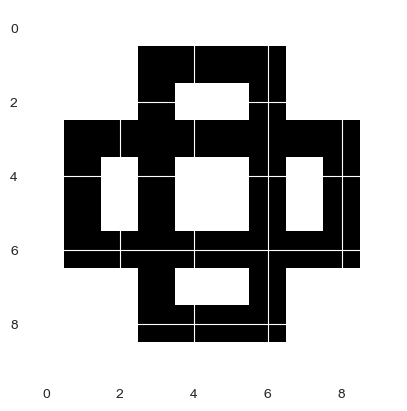

In [29]:
#matrix = generate_geometry(10, 2, 0.75, 1)
matrix = np.array([
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
    [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
    [0., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
    [0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
    [0., 1., 0., 1., 0., 0., 1., 0., 1., 0.],
    [0., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
    [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
    [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
])
print(matrix)
plt.imshow(matrix, cmap='gray_r')

[(1, 3), (1, 4), (1, 5), (1, 6), (2, 3), (2, 6), (3, 1), (3, 2), (3, 4), (3, 5), (3, 7), (3, 8), (4, 1), (4, 3), (4, 6), (4, 8), (5, 1), (5, 3), (5, 6), (5, 8), (6, 1), (6, 2), (6, 4), (6, 5), (6, 7), (6, 8), (7, 3), (7, 6), (8, 3), (8, 4), (8, 5), (8, 6)]


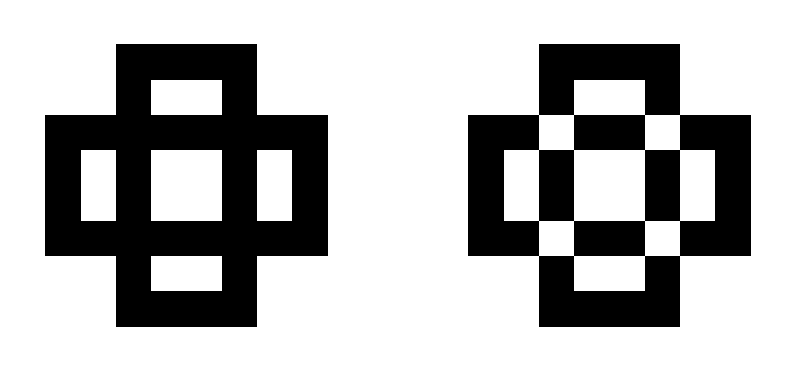

In [30]:
print(find_edge_pixels(matrix))
edge_matrix = get_edge_pixels_matrix(matrix)
visualize_matrices(matrix, edge_matrix)

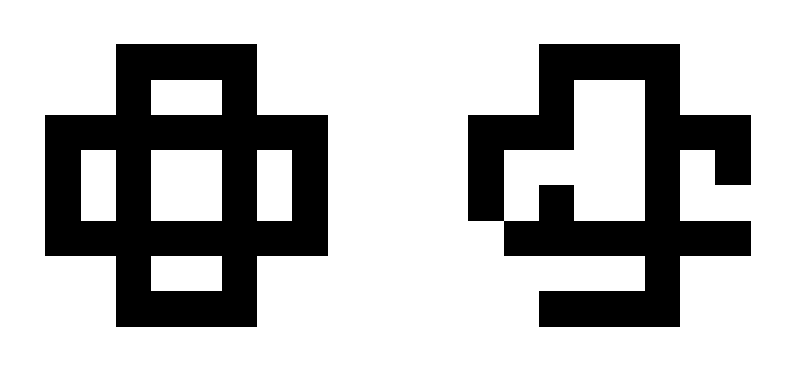

In [31]:
# Flip the edge pixels with a 50% chance
error_matrix = flip_edge_pixels(matrix, 0.1, seed=1)

# Display the original and flipped images side by side
visualize_matrices(matrix, error_matrix)

In [37]:
# Generate 100 matrices
matrices = generate_mutations(
    image=matrix,
    n=1000,
    size=10,
    symmetry=2,
    volume_fraction=0.5,
    flip_chance=0.1,
    seed=2
)

# Convert the list of matrices to a 3D numpy array
matrices_array = np.array(matrices)
print(matrices_array.shape)
print(type(matrices_array[0][0]))
# Export the array to a MATLAB .mat file
sio.savemat('error_geometries_fc10_rs2.mat', {'error_geometries': matrices_array})

(1000, 10, 10)
<class 'numpy.ndarray'>


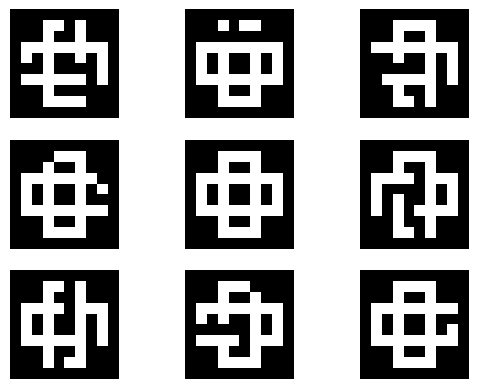

In [39]:
fig, axs = plt.subplots(3, 3)

# Plot the original image in the center
axs[1, 1].imshow(matrices_array[0], cmap='gray')
#axs[1, 1].set_title("Original")

# Remove axis for the original image
axs[1, 1].axis('off')

# Get 8 random samples from the matrices
samples = random.sample(list(matrices_array), 8)

# Loop over the subplots and add the images
for i, ax in enumerate(axs.flat):
    # Skip the center subplot
    if i != 4:
        # Adjust the index for samples when i is greater than or equal to 4
        sample_index = i if i < 4 else i - 1

        # Display the image
        ax.imshow(samples[sample_index], cmap='gray')

        # Remove the axes
        ax.axis('off')

# Show the plot
plt.show()